In [46]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score
import numpy as np
from matplotlib import pyplot as plt

In [5]:
data, target = datasets.load_digits(return_X_y=True)

## Задание 1

In [26]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

score = cross_val_score(model, data, target, cv=10 ).mean()
print(score)

0.825788330229671


## Задание 2

In [31]:
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier(
    DecisionTreeClassifier(),
    100
)

%timeit score = cross_val_score(model, data, target, cv=10, n_jobs=2 ).mean()
print(score)

7.75 s ± 379 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
0.9242768466790814


## Задание 3

In [37]:
model = BaggingClassifier(
    DecisionTreeClassifier(),
    100,
    max_features= np.sqrt(data.shape[1]).astype('int')
)

score = cross_val_score(model, data, target, cv=10, n_jobs=2 ).mean()
print(score)

0.9293234016139044


## Задание 4

In [38]:
model = BaggingClassifier(
    DecisionTreeClassifier(max_features= np.sqrt(data.shape[1]).astype('int')),
    100
)

score = cross_val_score(model, data, target, cv=10, n_jobs=2 ).mean()
print(score)

0.9510086902545002


## Задание 5

In [40]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100,
                                max_features=np.sqrt(data.shape[1]).astype('int'))

score = cross_val_score(model, data, target, cv=10, n_jobs=2 ).mean()
print(score)

0.951582867783985


In [56]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': np.arange(10,500,20)}


rf = RandomForestClassifier(max_features=np.sqrt(data.shape[1]).astype('int'))

model = GridSearchCV(rf, param_grid, cv=10, n_jobs=2)
model.fit(data,target)


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=8,
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_st

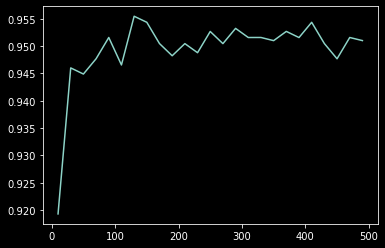

In [57]:
scores = model.cv_results_['mean_test_score']

plt.plot(model.param_grid['n_estimators'], scores)
plt.show()

#### 1) Случайный лес сильно переобучается с ростом количества деревьев
ЛОЖЬ
#### 2) При очень маленьком числе деревьев (5, 10, 15), случайный лес работает хуже, чем при большем числе деревьев
ПРАВДА
#### 3) С ростом количества деревьев в случайном лесе, в какой-то момент деревьев становится достаточно для высокого качества классификации, а затем качество существенно не меняется.
ПРАВДА


In [61]:
param_grid = {
    'n_estimators': [100],
    'max_features': np.arange(5,66,5)
}


rf = RandomForestClassifier()

model = GridSearchCV(rf, param_grid, cv=10, n_jobs=2)
model.fit(data,target)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

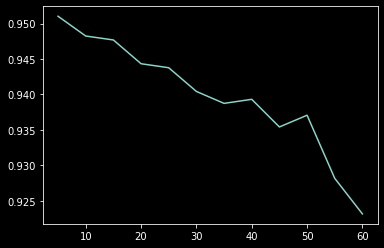

In [62]:
scores = model.cv_results_['mean_test_score']

plt.plot(model.param_grid['max_features'], scores)
plt.show()

#### 4) При большом количестве признаков (для данного датасета - 40, 50) качество классификации становится хуже, чем при малом количестве признаков (5, 10). Это связано с тем, что чем меньше признаков выбирается в каждом узле, тем более различными получаются деревья (ведь деревья сильно неустойчивы к изменениям в обучающей выборке), и тем лучше работает их композиция.

ПРАВДА
#### 5) При большом количестве признаков (40, 50, 60) качество классификации лучше, чем при малом количестве признаков (5, 10). Это связано с тем, что чем больше признаков - тем больше информации об объектах, а значит алгоритм может делать прогнозы более точно.
ЛОЖЬ

In [67]:
param_grid = {
    'n_estimators': [100],
    'max_features': [8],
    'max_depth': [4,5,6,10,15,25,50,100]
}


rf = RandomForestClassifier()

model = GridSearchCV(rf, param_grid, cv=10, n_jobs=2)
model.fit(data,target)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

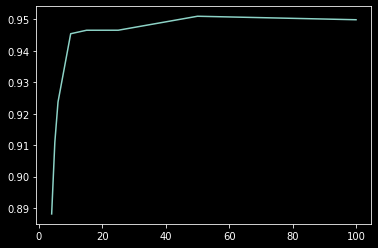

In [68]:
scores = model.cv_results_['mean_test_score']

plt.plot(model.param_grid['max_depth'], scores)
plt.show()

#### 6) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса намного лучше, чем без ограничения глубины, т.к. деревья получаются не переобученными. С ростом глубины деревьев качество ухудшается.
ЛОЖЬ

#### 7) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса заметно хуже, чем без ограничений, т.к. деревья получаются недообученными. С ростом глубины качество сначала улучшается, а затем не меняется существенно, т.к. из-за усреднения прогнозов и различий деревьев их переобученность в бэггинге не сказывается на итоговом качестве (все деревья преобучены по-разному, и при усреднении они компенсируют переобученность друг-друга).
ПРАВДА